In [1]:
import numpy as np
import utils.network as network
import pickle

# Define Network

In [2]:
num_nodes = 5
num_edges = 5
num_tunnels = 2

tunnel_edge2node_adjacencies = np.zeros([num_tunnels, num_nodes, num_edges])
external_arrival_rates = np.zeros([num_tunnels, num_nodes, ])
overlay_service_rates = np.zeros([num_tunnels, num_edges, ])
underlay_service_rates = np.zeros([num_tunnels, num_edges, ])

# tunnel 0
tunnel_edge2node_adjacencies[0,:,:] = np.array([[-1,0,0,0,0],
                                [1,-1,0,0,0],
                                [0,1,0,-1,0],
                                [0,0,0,1,-1],
                                [0,0,0,0,1]])
external_arrival_rates[0,:] = np.array([0.9,0,0,0,0])
overlay_service_rates[0,:] = np.array([1,0,0,0,0])
underlay_service_rates[0,:] = np.array([0,1,0,1,1])

# tunnel 1
tunnel_edge2node_adjacencies[1,:,:] = np.array([[-1,0,0,0,0],
                                [1,0,-1,0,0],
                                [0,0,0,0,0],
                                [0,0,1,0,-1],
                                [0,0,0,0,1]])
external_arrival_rates[1,:] = np.array([0.9,0,0,0,0])
overlay_service_rates[1,:] = np.array([1,0,0,0,0])
underlay_service_rates[1,:] = np.array([0,0,1,0,1])

In [3]:
adjacency_matrix = np.zeros([num_nodes, num_nodes])
adjacency_matrix = np.array([[0,1,0,0,0],
                              [-1,0,1,1,0],
                              [0,-1,0,1,0],
                              [0,-1,-1,0,0],
                              [0,0,0,-1,0]])

is_queue_in_tunnel = np.zeros([num_nodes, num_tunnels])
is_queue_in_tunnel[:,0] = np.array([1,1,1,1,1])
is_queue_in_tunnel[:,1] = np.array([1,1,0,1,1])

### Get Network Class

In [4]:
my_network = network.Network(num_tunnels,
    num_nodes,
    num_edges,
    underlay_service_rates,
    external_arrival_rates,
    tunnel_edge2node_adjacencies)

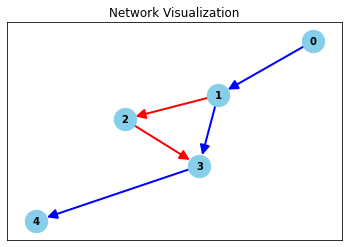

In [5]:
my_network.visualize()

In [6]:
packets_in_flight, tunnel_backlogs = my_network.simulate(overlay_service_rates, total_time = 10000, custom_seed = 5)

In [7]:
file_name = 'my_save'
np.save(file_name + '_packets_in_flight.npy', packets_in_flight)
np.save(file_name + '_tunnel_backlogs.npy', tunnel_backlogs)
with open(file_name + '_my_network.pkl', 'wb') as file:
    pickle.dump(my_network, file)

In [8]:
packets_in_flight_loaded = np.load(file_name + '_packets_in_flight.npy')
tunnel_backlogs_loaded = np.load(file_name + '_tunnel_backlogs.npy')
with open(file_name + '_my_network.pkl', 'rb') as file:
    my_network_loaded = pickle.load(file)

Shape of packets in flight (X) = (10000, 2)
Shape of total tunnel backlogs (Y) = (10000, 2)


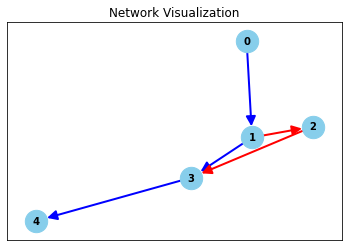

In [9]:
print('Shape of packets in flight (X) = ' + str(packets_in_flight_loaded.shape))
print('Shape of total tunnel backlogs (Y) = ' + str(tunnel_backlogs_loaded.shape))
my_network_loaded.visualize()